# Answers to the Questions of My Morning Jacket's Setlist History

Importing the necessary libraries to complete this project.

In [139]:
# Setup
from datetime import datetime 
import sys
import os

import numpy as np
import pandas as pd

import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

Connecting to the Database and Creating Tables within the DB.

In [114]:
conn = sqlite3.connect(r'JacketheadsDB.db')  # You can create a new database by changing the name within the quotes
c = conn.cursor() # The database will be saved in the location where the 'py' file is saved

#Create table - CONCERTS
c.execute('''CREATE TABLE CONCERTS
             ([generated_id] INTEGER PRIMARY KEY,[eventID] text, [artist] text, [eventdate] date, [venue] text, [venue_id] text,
              [city] text, [city_id] text, [city_lat] real, [city_lon] real, [state] text, [state_id] text, [country] text, 
              [country_id] text)''')
          
#Create table - SETLISTS
c.execute('''CREATE TABLE SETLISTS             
             ([generated_id] INTEGER PRIMARY KEY,[eventID] text, [song] text, [set] integer)''')
conn.commit()


Reading the data from the csv files pulled from an API Source. (https://www.setlist.fm/setlists/my-morning-jacket-33d69865.html)

In [115]:
concerts = pd.read_csv("My Morning JacketConcertsTracker.csv", sep=";" , engine="python", index_col=False, skip_blank_lines=True)
setlists = pd.read_csv("My Morning JacketSetlistsTracker.csv", sep=";" , engine="python", index_col=False, skip_blank_lines=True)


Pushing the dataframes created into the SQLite3 database.
Extra code to delete the duplicate and empty rows.
Close commit and print "Data Successful".

In [116]:
concerts.to_sql("CONCERTS", conn, if_exists="replace")
setlists.to_sql("SETLISTS", conn, if_exists="replace")
c.execute('''DELETE FROM CONCERTS WHERE rowid not in
         (SELECT min(rowid) from CONCERTS GROUP BY eventID)''')
c.execute('''DELETE FROM SETLISTS WHERE rowid not in
         (SELECT rowid from SETLISTS GROUP BY eventID, song)''')
c.execute('''DELETE FROM SETLISTS WHERE song = 'None' ''')
conn.commit()
print("Data Successful")

Data Successful


Seeing the shape of the dataframe, how many rows, and how many columns.

In [117]:
# shape of the two csv's
(concerts.shape, setlists.shape)

((4300, 13), (42455, 3))

Using the head function to get a quick snapshot.

In [118]:
#Taking a quick look at the concerts dataframe
concerts.head()


,eventID,artist,eventdate,venue,venue_id,city,city_id,city_lat,city_lon,state,state_id,country,country_id
0,1befa9a4,My Morning Jacket,05-03-2018,Hard Rock Hotel & Casino,63d51e17,Punta Cana,3510573,18.516667,-68.366667,La Altagracia,10,Dominican Republic,DO
1,53efbfa5,My Morning Jacket,03-03-2018,Hard Rock Hotel & Casino,63d51e17,Punta Cana,3510573,18.516667,-68.366667,La Altagracia,10,Dominican Republic,DO
2,13ee4171,My Morning Jacket,02-03-2018,Hard Rock Hotel & Casino,63d51e17,Punta Cana,3510573,18.516667,-68.366667,La Altagracia,10,Dominican Republic,DO
3,4be1d306,My Morning Jacket,31-12-2017,1st Bank Center,63d7aeff,Broomfield,5415035,39.920541,-105.086650,Colorado,CO,United States,US
4,63e1da6b,My Morning Jacket,30-12-2017,1st Bank Center,63d7aeff,Broomfield,5415035,39.920541,-105.086650,Colorado,CO,United States,US


Using the head function to get a quick snapshot.

In [119]:
#Taking a quick look at the setlists dataframe
setlists.head()

,eventID,song,set
0,1befa9a4,Evil Urges,0
1,1befa9a4,Touch Me I'm Going to Scream Pt. 1,0
2,1befa9a4,Highly Suspicious,0
3,1befa9a4,I'm Amazed,0
4,1befa9a4,Thank You Too!,0


Select the first 10 rows of data in the CONCERTS table to verify the contents.

In [120]:
pd.read_sql_query("select * from CONCERTS limit 10;", conn)

,index,eventID,artist,eventdate,venue,venue_id,city,city_id,city_lat,city_lon,state,state_id,country,country_id
0,0,1befa9a4,My Morning Jacket,05-03-2018,Hard Rock Hotel & Casino,63d51e17,Punta Cana,3510573,18.516667,-68.366667,La Altagracia,10,Dominican Republic,DO
1,1,53efbfa5,My Morning Jacket,03-03-2018,Hard Rock Hotel & Casino,63d51e17,Punta Cana,3510573,18.516667,-68.366667,La Altagracia,10,Dominican Republic,DO
2,2,13ee4171,My Morning Jacket,02-03-2018,Hard Rock Hotel & Casino,63d51e17,Punta Cana,3510573,18.516667,-68.366667,La Altagracia,10,Dominican Republic,DO
3,3,4be1d306,My Morning Jacket,31-12-2017,1st Bank Center,63d7aeff,Broomfield,5415035,39.920541,-105.086650,Colorado,CO,United States,US
4,4,63e1da6b,My Morning Jacket,30-12-2017,1st Bank Center,63d7aeff,Broomfield,5415035,39.920541,-105.086650,Colorado,CO,United States,US
5,5,43e1df23,My Morning Jacket,29-12-2017,1st Bank Center,63d7aeff,Broomfield,5415035,39.920541,-105.086650,Colorado,CO,United States,US
6,6,5be50bd4,My Morning Jacket,12-08-2017,MASS MoCA,7bd73680,North Adams,4945486,42.700915,-73.108715,Massachusetts,MA,United States,US
7,7,23e510b3,My Morning Jacket,11-08-2017,The Pavilion at Montage Mountain,1bd4c934,Scranton,5211303,41.408969,-75.662412,Pennsylvania,PA,United States,US
8,8,63e51ac7,My Morning Jacket,10-08-2017,EXPRESS LIVE!,7bd5de0c,Columbus,4509177,39.961176,-82.998794,Ohio,OH,United States,US
9,9,be449f2,My Morning Jacket,16-07-2017,Lakeview Amphitheater,bd591e6,Syracuse,5140405,43.048122,-76.147424,New York,NY,United States,US


Select the first 10 rows of data in the SETLISTS table to verify the contents.

In [121]:
pd.read_sql_query("select * from SETLISTS limit 10;", conn)

,index,eventID,song,set
0,0,1befa9a4,Evil Urges,0
1,1,1befa9a4,Touch Me I'm Going to Scream Pt. 1,0
2,2,1befa9a4,Highly Suspicious,0
3,3,1befa9a4,I'm Amazed,0
4,4,1befa9a4,Thank You Too!,0
5,5,1befa9a4,Sec Walkin,0
6,6,1befa9a4,Two Halves,0
7,7,1befa9a4,Librarian,0
8,8,1befa9a4,Look at You,0
9,9,1befa9a4,Aluminum Park,0


Running a select statement on the db to see a particular setlist to verify with the source.

In [122]:
pd.read_sql_query("SELECT eventID, song, [set] from SETLISTS where eventID = '13ee4171';", conn)

,eventID,song,set
0,13ee4171,Heartbreakin Man,0
1,13ee4171,They Ran,0
2,13ee4171,The Bear,0
3,13ee4171,Nashville to Kentucky,0
4,13ee4171,Old Sept. Blues,0
5,13ee4171,If All Else Fails,0
6,13ee4171,It's About Twilight Now,0
7,13ee4171,Evelyn Is Not Real,0
8,13ee4171,War Begun,0
9,13ee4171,Picture of You,0


Code to select an inner join query on the two separate tables and combine the data for one particular show.

In [123]:
pd.read_sql_query("SELECT S.eventID, S.song, S.[set], C.eventdate, C.venue, C.city, C.state, C.country  from SETLISTS as S INNER JOIN CONCERTS as C ON S.eventID = C.eventID WHERE S.eventID = '43e1df23';", conn)

,eventID,song,set,eventdate,venue,city,state,country
0,43e1df23,At Dawn,0,29-12-2017,1st Bank Center,Broomfield,Colorado,United States
1,43e1df23,Lowdown,0,29-12-2017,1st Bank Center,Broomfield,Colorado,United States
2,43e1df23,X-Mas Curtain,0,29-12-2017,1st Bank Center,Broomfield,Colorado,United States
3,43e1df23,It Beats 4 U,0,29-12-2017,1st Bank Center,Broomfield,Colorado,United States
4,43e1df23,Aluminum Park,0,29-12-2017,1st Bank Center,Broomfield,Colorado,United States
5,43e1df23,Heartbreakin Man,0,29-12-2017,1st Bank Center,Broomfield,Colorado,United States
6,43e1df23,Evelyn Is Not Real,0,29-12-2017,1st Bank Center,Broomfield,Colorado,United States
7,43e1df23,Slow Slow Tune,0,29-12-2017,1st Bank Center,Broomfield,Colorado,United States
8,43e1df23,Outta My System,0,29-12-2017,1st Bank Center,Broomfield,Colorado,United States
9,43e1df23,Carried Away,0,29-12-2017,1st Bank Center,Broomfield,Colorado,United States


Code to run a select query for one particular venue to double check for duplicate rows of data.

In [124]:
pd.read_sql_query("select * from CONCERTS where venue like '%Ascend%';", conn)

,index,eventID,artist,eventdate,venue,venue_id,city,city_id,city_lat,city_lon,state,state_id,country,country_id
0,16,7be41a78,My Morning Jacket,07-07-2017,Ascend Amphitheater,6bd5a28e,Nashville,4644585,36.16589,-86.784443,Tennessee,TN,United States,US
1,401,bf7bdce,My Morning Jacket,06-08-2015,Ascend Amphitheater,6bd5a28e,Nashville,4644585,36.16589,-86.784443,Tennessee,TN,United States,US


Code to read all of the data from the setlists table to verify duplicate delete method is confirmed complete.

In [125]:
pd.read_sql_query("SELECT * from SETLISTS GROUP BY eventID, song", conn)

,index,eventID,song,set
0,24393,13c30129,Anytime,1
1,24389,13c30129,Bermuda Highway,1
2,24387,13c30129,Cobra,0
3,24384,13c30129,Dondante,0
4,24370,13c30129,Evil Urges,0
5,24382,13c30129,Gideon,0
6,24377,13c30129,Golden,0
7,24392,13c30129,Highly Suspicious,1
8,24374,13c30129,I'm Amazed,0
9,24375,13c30129,It Beats 4 U,0


# Setlist History of My Morning Jacket

### My Morning Jacket has been known as one of the best touring bands of the past two decades.  The band formed in 1999 in Louisville, KY and has taken the live music scene by storm in recent years.  Their slow start and humble beginnings gave them plenty of time to set the stage for their now heroic and historic live performances that have been known to leave the audience speechless.  
### This project will showcase the 20 years of music that has been played by the band.  The venues that the songs were played in and just how influential geography can be in that song selection.  For years, the fans have asked: Why did they select these songs at this location?  What song from the first album has been played the most?  What songs do you think they will play tonight?  Will they play another 30 minute Dondante like they did in Broomfield in 2017?  Some of these questions will be answered in this report.
### All of these setlists and more by other artists can be found at https://www.setlist.fm/ .

In [126]:
pd.read_sql("SELECT count(eventID) AS [Number of Concerts] FROM CONCERTS", conn)

,Number of Concerts
0,860


SQL Query to gather all of the concert data with songs

In [129]:
df = pd.read_sql_query("SELECT S.eventID, S.song, S.[set], C.eventdate, C.venue, C.city, C.state, C.country  from SETLISTS as S INNER JOIN CONCERTS as C ON S.eventID = C.eventID;", conn)

In [134]:
df.rename(
    columns={
        'eventID':'Event ID',
        'song': 'Song',
        'set': 'Set',
        'eventdate': 'Event Date', 
        'venue': 'Venue', 
        'city': 'City', 
        'state': 'State', 
        'country': 'Country'
    }, 
    inplace=True)

In [135]:
df

,Event ID,Song,Set,Event Date,Venue,City,State,Country
0,1befa9a4,Evil Urges,0,05-03-2018,Hard Rock Hotel & Casino,Punta Cana,La Altagracia,Dominican Republic
1,1befa9a4,Touch Me I'm Going to Scream Pt. 1,0,05-03-2018,Hard Rock Hotel & Casino,Punta Cana,La Altagracia,Dominican Republic
2,1befa9a4,Highly Suspicious,0,05-03-2018,Hard Rock Hotel & Casino,Punta Cana,La Altagracia,Dominican Republic
3,1befa9a4,I'm Amazed,0,05-03-2018,Hard Rock Hotel & Casino,Punta Cana,La Altagracia,Dominican Republic
4,1befa9a4,Thank You Too!,0,05-03-2018,Hard Rock Hotel & Casino,Punta Cana,La Altagracia,Dominican Republic
5,1befa9a4,Sec Walkin,0,05-03-2018,Hard Rock Hotel & Casino,Punta Cana,La Altagracia,Dominican Republic
6,1befa9a4,Two Halves,0,05-03-2018,Hard Rock Hotel & Casino,Punta Cana,La Altagracia,Dominican Republic
7,1befa9a4,Librarian,0,05-03-2018,Hard Rock Hotel & Casino,Punta Cana,La Altagracia,Dominican Republic
8,1befa9a4,Look at You,0,05-03-2018,Hard Rock Hotel & Casino,Punta Cana,La Altagracia,Dominican Republic
9,1befa9a4,Aluminum Park,0,05-03-2018,Hard Rock Hotel & Casino,Punta Cana,La Altagracia,Dominican Republic


SQL Query to return the top ten most songs played by the band for use in cat plot.

In [151]:
df2 = pd.read_sql("SELECT song, count(*) AS [Song Count] FROM SETLISTS GROUP BY song ORDER BY [Song Count] DESC Limit 10", conn)

In [152]:
df2

,song,Song Count
0,One Big Holiday,344
1,Mahgeetah,291
2,Wordless Chorus,286
3,Golden,265
4,Off the Record,263
5,Run Thru,244
6,Gideon,236
7,The Way That He Sings,224
8,Touch Me I'm Going to Scream Pt. 2,217
9,Dondante,208


Cat Plot for the top ten songs played by the band and their occurrences.

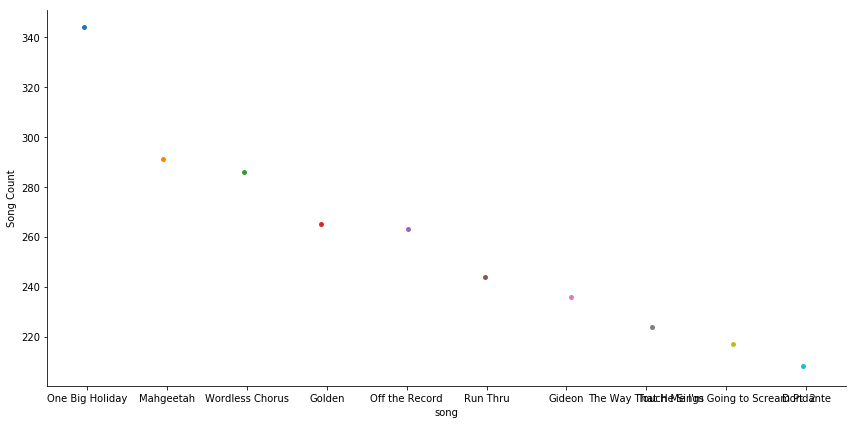

In [172]:
af = sns.catplot(
    x = "song",
    y = "Song Count",
    data = df2,
    height = 6,
    aspect = 2
)
